# Final assessment for MSc module "Programming for Data Science"

### Task 6 - Explore the dataset to identify an "interesting" pattern or trend

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

#read in data and observe
part_2a = pd.read_csv('part_2a.csv')
part_2b = pd.read_csv('part_2b.csv')
part_2a.info()
part_2b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   region                                    51 non-null     int64  
 1   median_household_income                   51 non-null     int64  
 2   share_unemployed_seasonal                 51 non-null     float64
 3   share_population_in_metro_areas           51 non-null     float64
 4   share_population_with_high_school_degree  51 non-null     float64
 5   share_non_citizen                         48 non-null     float64
 6   share_white_poverty                       51 non-null     float64
 7   gini_index                                51 non-null     float64
 8   share_non_white                           51 non-null     float64
 9   share_voters_voted_to_the_right           51 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 4.

In [2]:
#combine datasets
regional_data_combined = pd.merge(left=part_2a, right=part_2b)

#rename some columns for simplicity
regional_data_renamed = (
    regional_data_combined.rename(columns={
        'median_household_income':'med_income',
        'share_unemployed_seasonal':'unemp_seasonal',
        'share_population_in_metro_areas':'metro_pop',
        'share_population_with_high_school_degree':'hs_degree',
        'share_voters_voted_to_the_right':'votes_to_right',
        'avg_biascrimes_per_100k':'bias_crimes',
        'share_non_citizen':'non_citizen',
        'share_white_poverty':'white_poverty',
        'share_non_white':'non_white'
        })
)

#make copies of data for exploration
rd = regional_data_renamed.copy()

#view tidied dataframe
rd.head()

,region,med_income,unemp_seasonal,metro_pop,hs_degree,non_citizen,white_poverty,gini_index,non_white,votes_to_right,bias_crimes
0,1,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,1.806410
1,2,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,1.656700
2,3,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,3.413928
3,4,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.869209
4,5,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,2.397986


#### Initial exploration - visualisation 1 - correlation matrix heatmap

To begin, I produced a heatmap based on a correlation matrix. To make the correlation matrix, I used Pearson's Correlation Coefficient, which quantified the relationships between all of the indicators in the dataset. This outputted a matrix of coefficients between -1 (strongest negative correlation) and 1 (strongest positive correlation). 

Next, I rendered these coefficients into a heatmap, which visually represents the strength of the relationships. I used a diverging colour palette centred on 0; the darker the colour of the cell, the closer the coefficient to either end of the spectrum (-1 red to 1 blue) and, thus, the stronger the relationship between the relevant indicators. 

The heatmap will enable me to identify a selection of indicators where strong and/or interesting linear relationships are likely to be evident.

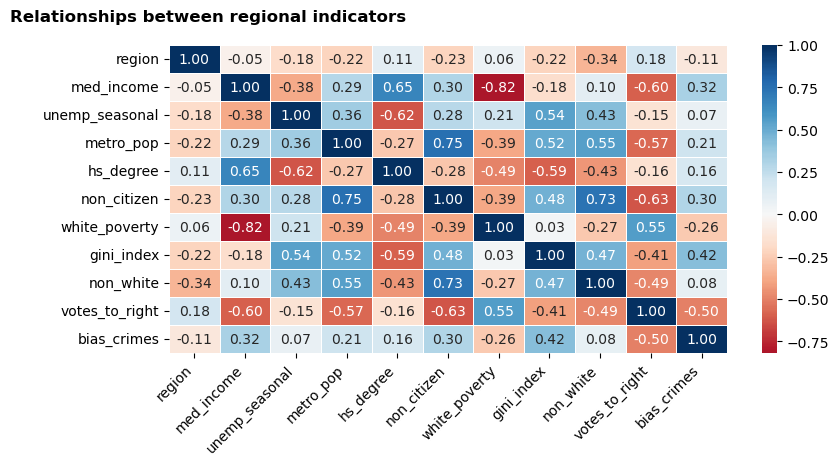

In [3]:
#get matrix of pearson coefficients
corr = rd.corr(method = 'pearson')

#render heatmap
plt.figure(figsize = (9, 4))
plt.title("Relationships between regional indicators", y=1.05, x=0.07, fontweight="bold", fontsize=12)
hm = sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap='RdBu', center=0)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right') #code from Bobbitt (2022b)
plt.show()

#### Initial exploration - visualisation 2 - scatter and histogram pairplot

From the heatmap, I identified seven of the most highly correlated indicators that stood out to me as potentially interesting relationships to explore further. These do not necessarily represent the top seven strongest relationships: for example, I excluded `non-citizen` vs `non-white` (r = 0.73) as I felt that it would be difficult to conduct meaningful analysis on this relationship without context about the regions and demographics represented in the dataset.

The seven indicators that I chose to explore further are:
- `med_income` and `white_poverty`
    - Strongest correlation of the dataset (r = -0.82)
- `metro_pop` and `non_citizen`
    - Strong correlation (r = 0.75)
- `votes_to_right` and `hs_degree`
    - Negligible correlation with each other, but coefficients of circa ±0.6 with multiple other indicators
- `gini_index`
    - Some moderate correlations and may add an interesting additional dimension

The next step that I took was to create a pairplot, comprising scatterplots (visualising the relationships between each indicator) and histograms (visualising the distribution of each individual indicator). It was important to view the shape of the data, as it could reveal non-linear relationships not indicated by the Pearson's coefficients used above (which assumes linearity); it will also be useful to view the distribution of the data as this may reveal non-normality that could impact subsequent stages of the analysis.

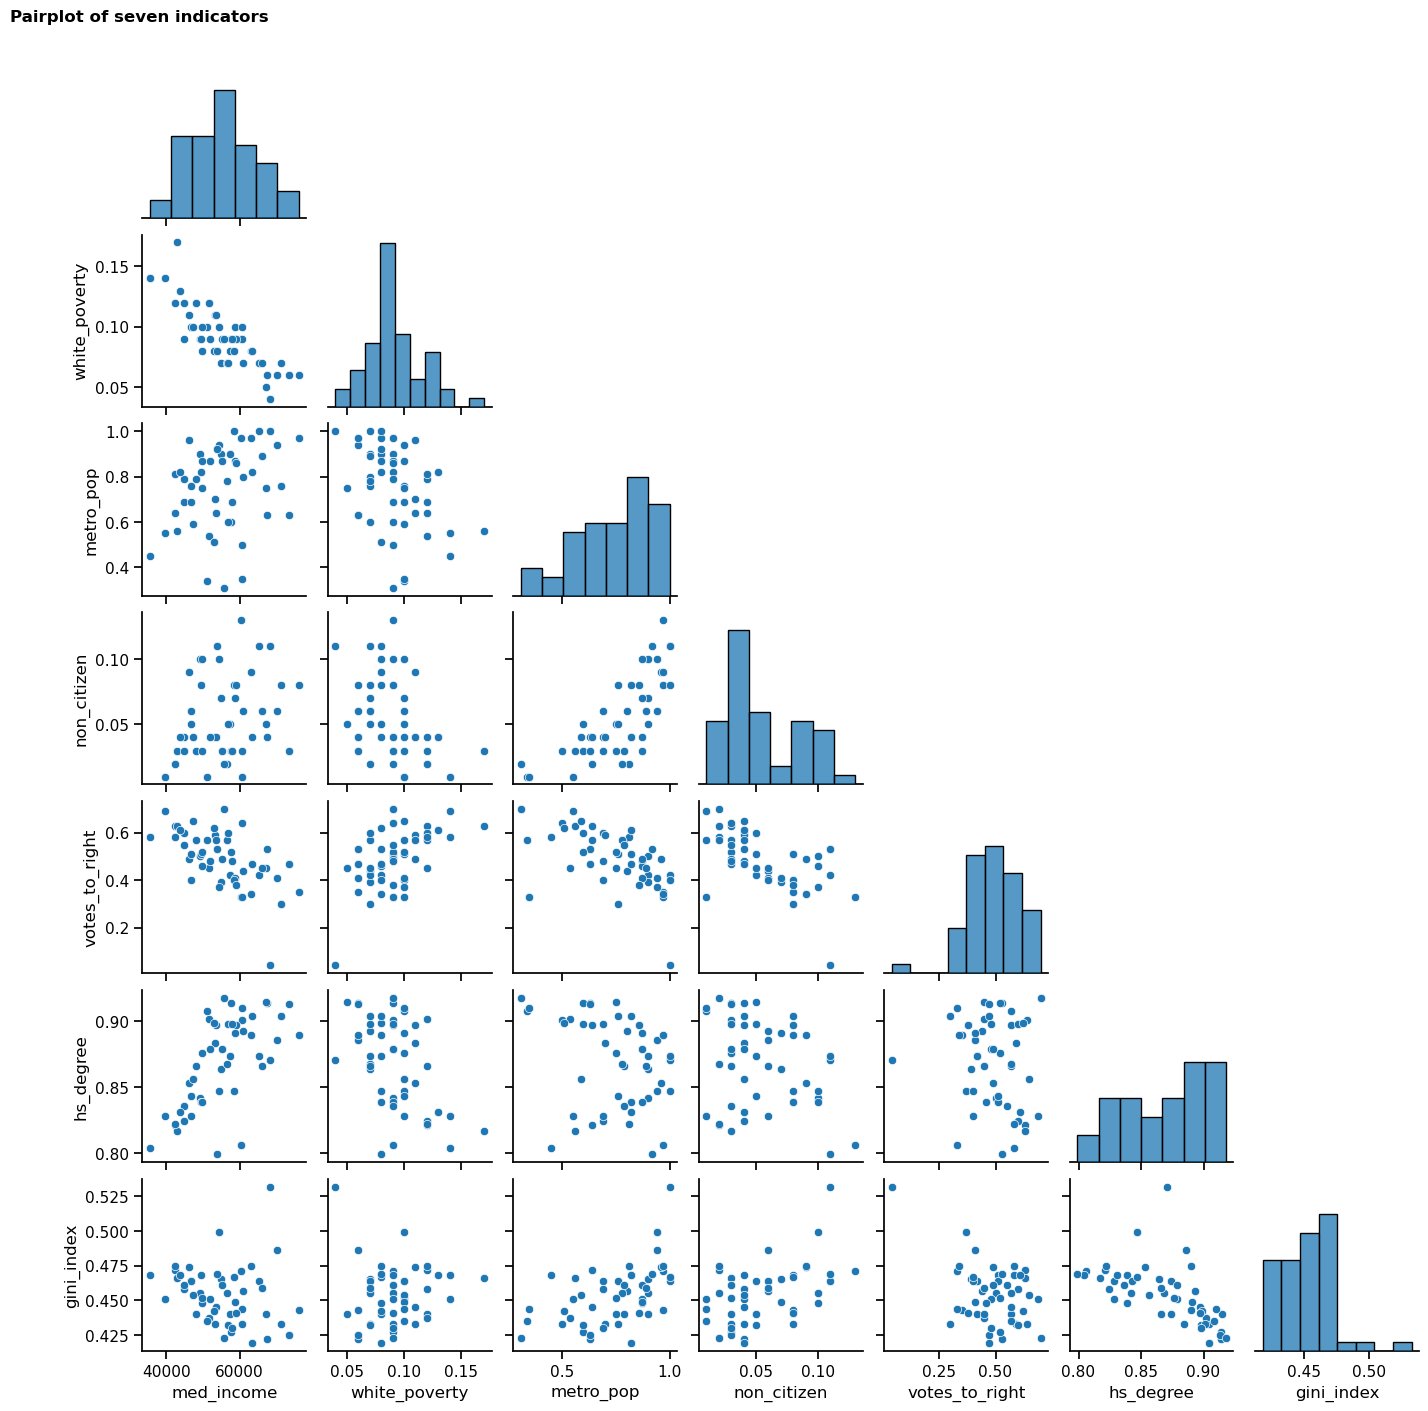

In [4]:
#filter to seven indicators
rd_viz2 = rd[['med_income','white_poverty','metro_pop','non_citizen','votes_to_right','hs_degree','gini_index']]

#make a pairplot to view shape of correlations/frequency
sns.set_context("notebook")
sns.pairplot(rd_viz2, corner=True, height=2)
plt.suptitle("Pairplot of seven indicators", y=1.01, x=0.07, fontweight="bold", fontsize=12)
plt.show()

#### Initial exploration - visualisation 3 - scatterplots

Having scrutinised the pairplot, I identified a potential relationship between `hs_degree`, `med_income` and `gini_index`. I decided to investigate whether the percentage of a region's population who hold a high school degree is associated with the median income and the income equality of that region. When considered in tandem with the Pearson's coefficients, the shapes of the scatterplots in the pairplot further suggest that the relationship between these indicators may be meaningful. I will investigate further but I suspect that the higher the educational attainment of citizens in a given society, the higher the median income and income equality. I acknowledge that it is not possible to determine causation from this correlation alone but it will be interesting to explore the relationship. 

In order to investigate these three indicators more closely, I made a scatterplot for each relationship with its respective Pearson's coefficient. I also rendered the trend line for each plot, which begins to visually explore the strength of the relationships; this will be investigated in more detail in Task 8.

The scatterplots indicate that some outliers may be present, which I will explore further in Task 7.

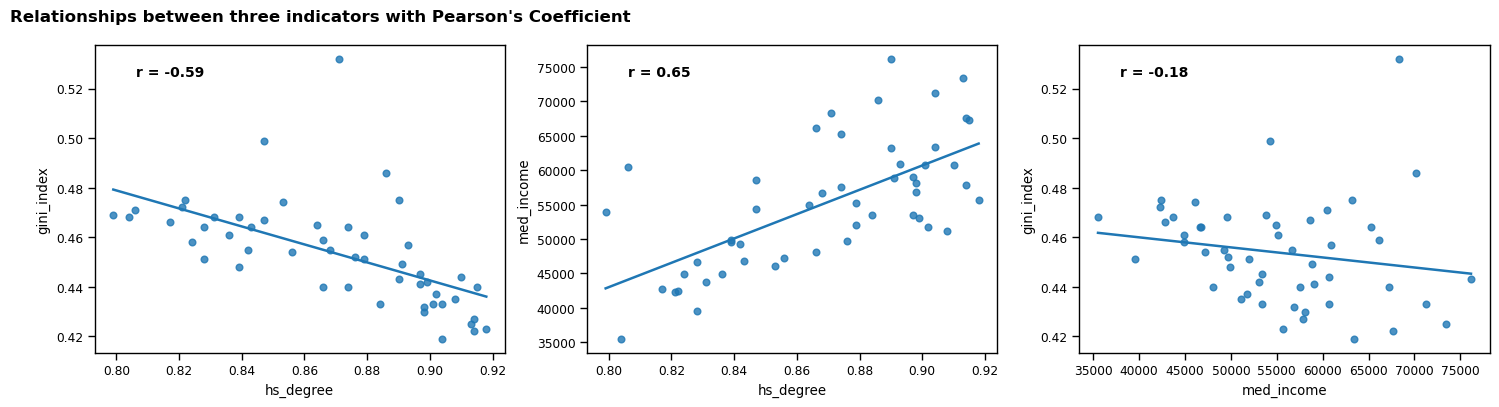

In [5]:
#initialise variables - list of indicators to compare and empty list to store value of pearson's coefficient
rd_viz3 = [
    ('hs_degree', 'gini_index'),
    ('hs_degree', 'med_income'),
    ('med_income', 'gini_index')
]
coefficients = []

#calculate r for each pair and store in list
for i in rd_viz3:
    coefficients.append((i[0], i[1], stats.pearsonr(rd[i[0]], rd[i[1]])[0]))

#make plots with trend lines and pearson's coefficient
sns.set_context("paper")
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
plt.title("Relationships between three indicators with Pearson's Coefficient", y=1.05, x=-1.85, fontweight="bold", fontsize=12)
for i,el in enumerate(coefficients):
    sns.regplot(data=rd, x=rd[el[0]], y=rd[el[1]], ax=ax[i], ci=None)
    ax[i].text(0.1, 0.9, f'r = {el[2]:.2f}', transform=ax[i].transAxes, fontsize=10, fontweight="bold") #code adapted from Chugani (2024)

### Task 7 - Detect and remove any outliers in the data used for your "interesting" pattern or trend

The first approach that I took to detecting outliers was to render a boxplot for each indicator. This provided a visualisation of the spread of the data, and quickly highlighted that there appears to be one outlier. 

Next, I built on the boxplots by calculating the z-score for each value; this provided a way to detect outliers to a higher degree of precision by quantifying how many standard deviations the values are from the mean. I decided to use a threshold of z = 3 to detect outliers, as this is considered best practice when highlighting extreme values without being overly strict (Tharaka, 2025). I calculated the z-scores for all three indicators and printed the result. This process confirmed that there is one outlier in `gini_index`. 

I considered whether to retain the outlier because it is possible that it is a valid, albeit unusual, value. However, I felt that there was a risk that it could adversely affect the hypothesis test in Task 8, so I chose to remove it to ensure a more reliable result. As such, I concatenated the z-score column for `gini_index` with the dataframe so that I could safely remove the row with the outlier.

Lastly, I created a scatterplot to combine and visualise all three indicators following the removal of the outlier. This provided a final opportunity to assess the relationship between all three indicators and its trend. I built my plot with `med_income` on the y-axis (to reflect its position as the possible dependent variable in my hypothesis test); `hs_degree` on the x-axis (independent variable); and `gini_index` represented by both the size and colour of the scatterplot points. I felt that these decisions would contribute to a clear and easily interpretable visualisation of the data.

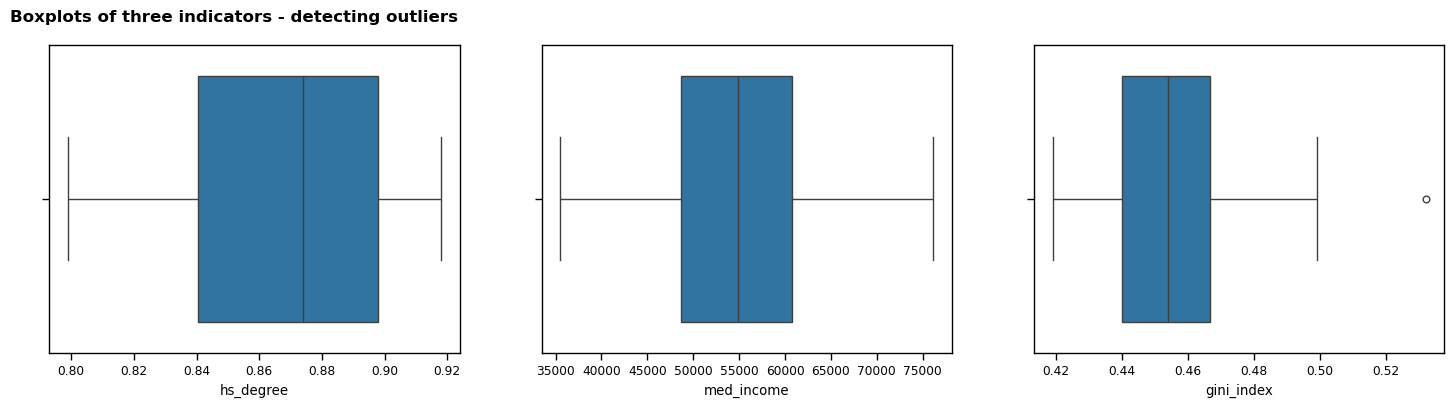

In [6]:
rd_outliers = rd[['hs_degree','med_income','gini_index']]

#make boxplots
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
plt.title("Boxplots of three indicators - detecting outliers", y=1.05, x=-1.95, fontweight="bold", fontsize=12)
for i,el in enumerate(rd_outliers):
    sns.boxplot(x=rd[el], ax=ax[i])

In [7]:
#calculating z-score to detect outliers and decide whether to remove them
z_scores = np.abs((rd_outliers - rd_outliers.mean()) / rd_outliers.std()) #code from Eichner (2023)

#confirm that only one outlier is present
num_outliers = np.sum(z_scores > 3, axis=0).sum()
print(f"The selected indicators contain {num_outliers} outlier(s).")

#add z-score column for gini_index
rd_outliers = pd.concat([rd_outliers, z_scores['gini_index'].rename('gi_z_score')], axis='columns')

The selected indicators contain 1 outlier(s).


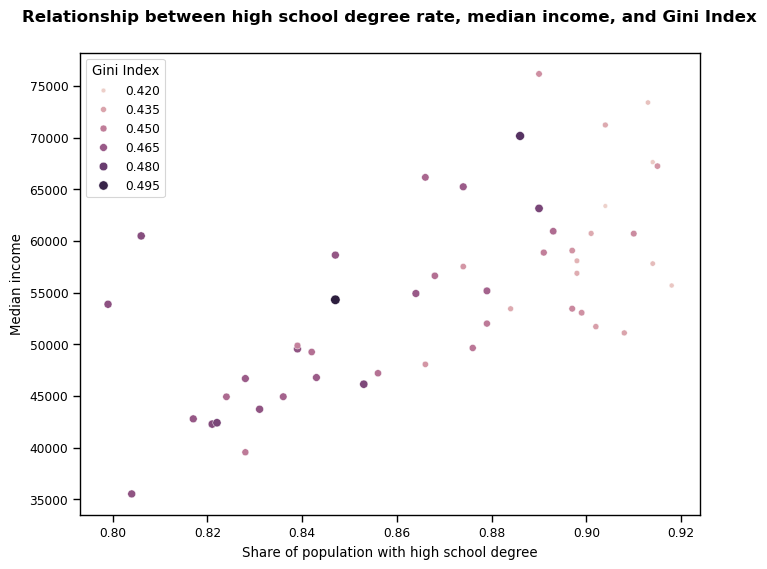

In [8]:
#remove outlier from dataframe
rd_less_outliers = rd_outliers[rd_outliers['gi_z_score'] < 3]

#get final version of data
rdlo = rd_less_outliers.copy()

#visualise selected indicators with outlier removed
plt.figure(figsize = (8, 6))
g = sns.scatterplot(x=rdlo['hs_degree'], y=rdlo['med_income'], hue=rdlo['gini_index'], size=rdlo['gini_index'])
plt.title("Relationship between high school degree rate, median income, and Gini Index", y=1.05, x=0.5, fontweight="bold", fontsize=12)
plt.xlabel('Share of population with high school degree')
plt.ylabel('Median income')
plt.legend(title="Gini Index")
plt.show()

### Task 8 - Define a hypothesis to test your “interesting” pattern or trend an test your hypothesis with statistical significance level of 0.05

#### Hypothesis test - background

I will use a linear regression model to test my hypothesis.

Before conducting my hypothesis test, I decided to run a Shapiro-Wilk test to check the indicators for normality. The results showed that `med_income` is likely normally distributed (p = 0.95), but there was some evidence that `hs_degree` is non-normal (p = 0.01) (Choueiry, n.d.). For this reason, I next checked the skewness of `hs_degree`; the socioeconomic context of the regions from where the data was collected is unknown but, in the UK and similar countries, it would be fair to expect that the proportion of people graduating high school would be higher than those who do not, i.e. a left skew. The skew test shows that there is a negative skew to this data (-0.38) but as it is mild and it will be the independent variable in my linear regression model, I decided not to apply any transformation (Bobbitt, 2022a).

To complete my exploration of this interesting trend, I decided to exclude Gini Index from the model. Compared to the correlation between the other two indicators, `gini_index` has lower respective Pearson's coefficients; as such, I felt that concentrating on the relationship between `hs_degree` and `med_income` would be a more impactful analysis.

In [14]:
#dictionary for saving results of shapiro-wilk tests
sw_results = {
    'hs_degree': 0,
    'med_income': 0
}

#test normality
for key in sw_results.keys():
    sw_results[key] = f"p = {stats.shapiro(rdlo[key])[1]:.4f}"

print(f'The results of the Shapiro-Wilk test are: {sw_results}')

The results of the Shapiro-Wilk test are: {'hs_degree': 'p = 0.0101', 'med_income': 'p = 0.9485'}


In [10]:
#calculate skewness of hs_degree
print(f'Skew of hs_degree: {rdlo['hs_degree'].skew():.4f}')

Skew of hs_degree: -0.3841


#### Stating the hypothesis

$H_0$: there is no relationship between the share of the population with a high school degree and the region's median income ($\beta = 0$)  
$H_1$: there is a relationship between these two indicators ($\beta \ne 0$)

(Bobbitt, 2021)

#### Testing the hypothesis

To test my hypothesis, I will use the formula API from the `statsmodels` library, to build an Ordinary Least Squares linear regression model. The API enabled me to use R-like syntax, which I found helpful because I was familiar with this from another module. The purpose of this is to use the data to test whether there is a statistically significant positive relationship between `hs_degree` and `med_income`. 

Next I will fit the model and print a summary of the output.

In [11]:
#fit the linear regression model
mod = smf.ols(formula='med_income ~ hs_degree', data=rdlo)
res = mod.fit()
print(res.summary())

#code from Perktold et al. (2024)

                            OLS Regression Results                            
Dep. Variable:             med_income   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     38.20
Date:                Wed, 07 May 2025   Prob (F-statistic):           1.33e-07
Time:                        14:29:24   Log-Likelihood:                -511.66
No. Observations:                  50   AIC:                             1027.
Df Residuals:                      48   BIC:                             1031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.816e+04   2.48e+04     -3.959      0.0

### Assessing the assumptions of my model

The output from the OLS linear regression model suggests that there is a dependency between the two indicators - the model explains approximately 43% of the variance in the independent variable `med_income`. With a p-value for the f-statistic far smaller than 0.05, we can conclude that this relationship is statistically significant. 

I also produced a Fitted vs Residuals plot and a Q-Q plot to explore the reliability of my linear regression model. These both show that my model is reasonably reliable:
- The residuals (left) are generally randomly scattered around the fitted line and are largely homoscedastic (Moreno, 2019). There is some variance apparent, but I feel that this is not so extreme as to depreciate the usefulness of my model. 
- Whilst there is a slight curve apparent in the Q-Q plot, this is potentially due to the minor non-normality of the `hs_degree` indicator (Waples, 2024).

In summary, the above tests provide enough evidence to enable me to reject the null hypothesis and conclude that there is a significant relationship between the share of the population with a high school degree and the region's median income ($\beta \ne 0$) for this dataset.

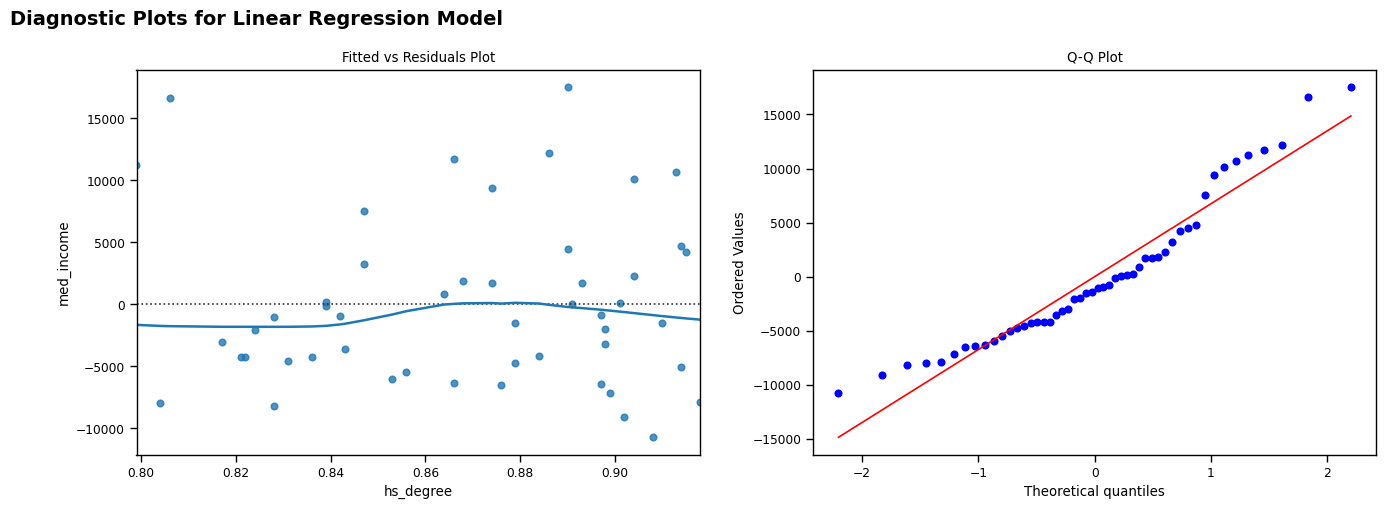

In [12]:
#make fitted vs residuals and q-q plots
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle("Diagnostic Plots for Linear Regression Model", fontsize=14, fontweight='bold', y=1, x=0.2)
sns.residplot(x=rdlo['hs_degree'], y=rdlo['med_income'], lowess=True, ax=ax[0])
stats.probplot(res.resid, dist="norm", plot=plt)
ax[0].set_title("Fitted vs Residuals Plot")
ax[1].set_title("Q-Q Plot")
plt.show()

#code adapted from Perktold et al. (2024)

#### Final visualisation

Finally, I produced a scatterplot with regression line (including confidence bands), to visualise the relationship between the share of population with a high school degree as the independent variable, and median income as the dependent variable, for the 51 regions. I also calculated the Spearman's Rank Coefficient (rho) for the relationship, both to provide a numerical metric to add context to the visualisation, and to support the findings of the hypothesis test whilst accounting for the fact that `hs_degree` is slightly non-normal.

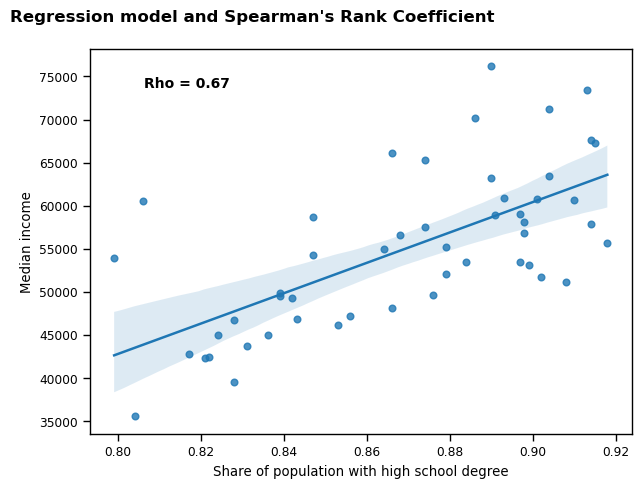

In [13]:
#calculate rho
rho = stats.spearmanr(rdlo['hs_degree'], rdlo['med_income'])

#make plots to show linear regression model
fig, ax = plt.subplots(figsize = (7, 5))
plt.title("Regression model and Spearman's Rank Coefficient", y=1.05, x=0.3, fontweight="bold", fontsize=12)
sns.regplot(data=rdlo, x=rdlo['hs_degree'], y=rdlo['med_income'])
plt.text(0.1, 0.9, f'Rho = {round((rho[0]),2)}', transform=ax.transAxes, fontsize=10, fontweight="bold") #code adapted from Chugani (2024)
plt.xlabel('Share of population with high school degree')
plt.ylabel('Median income')
plt.show()

### Bibliography

Bobbitt, Z. (2021) *Understanding the Null Hypothesis for Linear Regression* [blog]. 14 May. Available from: https://www.statology.org/null-hypothesis-for-linear-regression/ [Accessed 30 April 2025].

Bobbitt, Z. (2022a) *How to Interpret Skewness in Statistics (With Examples)* [tutorial]. Available from: https://www.statology.org/skewness-interpretation/ [Accessed 30 April 2025].

Choueiry, G. (no date) *How to Report the Shapiro-Wilk Test* [tutorial]. Available from: https://quantifyinghealth.com/report-shapiro-wilk-test/ [Accessed 22 April 2025].

Chugani, V. (2024) *Skewness Be Gone: Transformative Tricks for Data Scientists* [tutorial]. Available from: https://machinelearningmastery.com/skewness-be-gone-transformative-tricks-for-data-scientists/  [Accessed 24 April 2025].

Moreno, A. (2019) *Linear Regression Plots: Fitted vs Residuals* [blog]. 27 March. Available from: https://boostedml.com/2019/03/linear-regression-plots-fitted-vs-residuals.html [Accessed 1 May 2025].

Perktold, J. et al. (2024) *Fitting models using R-style formulas* [online]. Available from: https://www.statsmodels.org/stable/example_formulas.html [Accessed 24 April 2025].

Tharaka, S. (2025) *Z-Score Outlier Detection Explained: How to Identify Anomalies in Your Data?* [tutorial] Available from: https://www.mlinsightful.com/z-score-outlier-detection-explained/ [Accessed 27 April 2025].

Waples, J. (2024) *The Q-Q Plot: What It Means and How to Interpret It* [tutorial]. Available from: https://www.datacamp.com/tutorial/qq-plot [Accessed 2 May 2025].